<a href="https://colab.research.google.com/github/Sanatan-Shrivastava/Certificates/blob/main/final_project_sanatan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# CS 6375 : Machine Learning Project

### Notebook for the Machine Learning Project, **"Prediction of Cardiac Disorders using Machine Learning"**

In [ ]:
# import generic python libraries for pre-processing

# import numpy for mathematical caluclation, and linear algebra routines.
import numpy as np

# since boston housing dataset is a part of sklearn, import sklearn to load data
# Please NOTE : Since this notebook simulates Linear Regression from scratch, linear_regression() from sklearn will NOT be used.
import sklearn

# Pandas is for pre-processing (I/O); to read data etc.
import pandas as pd

import requests
import io

# To visualize data
import matplotlib.pyplot as plt

# Seaborn is another python library based on 'matplotlib' to visualize data.
import seaborn as sns

# With '%matplotlib', the ouput of plotting is displated inline within the jupyter notebook; right below the code cell in specific.
%matplotlib inline

from collections import Counter

Importing the dataset ('heartuci.csv' - Consists of UCI heart dataset and another dataset; all values are unique)

In [ ]:
# read_csv() that retrieves data in the form of the Dataframe
# importing pandas to access read_csv() method

url = "https://raw.githubusercontent.com/Sanatan-Shrivastava/Final_Project_6375-Sanatan/main/heart.csv?token=GHSAT0AAAAAABZMBEC5WD3U2A2NOFYFQ6SUY4WXNNQ"
download = requests.get(url).content
dataset = pd.read_csv(io.StringIO(download.decode('utf-8')), error_bad_lines=False)

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


Analyzing the Dataset
---


In [ ]:
# let us understand the 'type' of our dataset;
# We shall already know that we have defined dataset as type 'Dataframe'
type(dataset)

# Shape of the dataset; 'shape' attribute helps us understand the dimensions of the dataset (number of rows, number of columns).
dataset.shape

(303, 14)

Sample of the dataset can be printed either by using head(k) function that prints the top 'k' rows or by using sample(k) which prints the random 'k' rows out the entire dataset.

In [ ]:
# printing the top 5 rows from the dataset
dataset.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Dataframe description
---

Description of the dataset: The detailed description of the dataset can be found in the project report.
Description of the dataframe:
The DataFrame's data is described via the **describe()** method.

If the DataFrame includes numerical data, each column's description will provide the following details:
1. count - The number of not-empty values.
2. mean - The average (mean) value.
3. std - The standard deviation.
4. min - the minimum value.
5. 25% - The 25% percentile*.
6. 50% - The 50% percentile*.
7. 75% - The 75% percentile*.
8. max - the maximum value.

In [ ]:
# describing the dataframe
df_description = dataset.describe()
print(df_description);

              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.9051

The features/attributes that are being used here are as follows:
1. **age**: Person’s age
2. **sex**: gender of the person (1=male; 0=female)
3. **cp**: chest pain type (more details in the project report)
4. **trestbps**: resting blood pressure
5. **chol**: Cholesterol level in the blood in mg/dl
6. **fbs**: fasting blood sugar level > 120 ml (1 = true; 0 = false)
7. **restecg**: ecg (electrocardiogram) value at resting
8. **thalach**: maximum heartrate
9. **exang**: exercise induced angina (pain) (1 = true; 0 = false)
10.  **oldpeak**: ST depression induced by exercise relative to rest
11.  **slope**: slope of peak exercise against ST
12.  **ca**: number of major vessels colored by fluoroscopy
13.  **thal**: blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)
14.  **num**: Predicted heart diagnosis (1 = true, 0 = false)

More details can be found at: https://archive.ics.uci.edu/ml/datasets/heart+Disease [Official Dataset of UCI repository]

In [ ]:
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]

for i in range(len(info)):
    print(dataset.columns[i]+":\t\t\t"+info[i])

age:			age
sex:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


Analysis of the target variable
---

The aspect of a dataset that you want to comprehend better is the **target variable**. The user would want to predict this variable using the rest of the dataset.

Let us understand the target variable and the description of the target dataframe.
Similar to above, we will use describe() to fetch the description of the 'target' description.

In [ ]:
dataset["target"].describe()

# On the basis of this, we will be drawing comparison on the rest of the values in the dataset.

count    303.000000
mean       0.544554
std        0.498835
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: target, dtype: float64

To understand if this is a classification problem or a regression problem, we can observe the number of values OR the range of the target variable.

If there are two values, then we can percieve the rest of the problem as the classification problem.

In [ ]:
unique_target_values = dataset["target"].unique()
print("The number of unique values in 'target' on this dataset is: ", len(unique_target_values))
print("The unique values in 'target' on this dataset is: ", unique_target_values)

# Thus it is clear that this is a classification problem, as expected.

The number of unique values in 'target' on this dataset is:  2
The unique values in 'target' on this dataset is:  [1 0]


Correlation between the features:
-----

Here, let us understand the correlation between the features and the extent to which they are coorelated to the target variable.
Important thing to note that the correlaton is based purely on the magnitude and not the sign of the attribute.

For this purpose, we are using the Pandas' **.corr()** function to determine the pairwise correlation of all columns in a given dataframe.
Even though we have a dataset which has been pre-processed to remove any noise, please note, Any NaN values are immediately disregarded.
The Dataframe ignores any columns or data types that are not numeric.

In [ ]:
corr_values = dataset.corr()["target"]

# removing sign if any : using .abs() function; some features do negatively correlate to the 'target' feature.
corr_values = corr_values.abs()

# sorting values in descending order to rank the features in their correlation to the target; for this we will use .sort_values() function
corr_values.sort_values(ascending=False)

target      1.000000
exang       0.436757
cp          0.433798
oldpeak     0.430696
thalach     0.421741
ca          0.391724
slope       0.345877
thal        0.344029
sex         0.280937
age         0.225439
trestbps    0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: target, dtype: float64

## Correlation Matrix

Here, post understanding the correlation between the features, let us visualize this correlation with the help of a **heatmap** using seaborn and Matplotlib.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


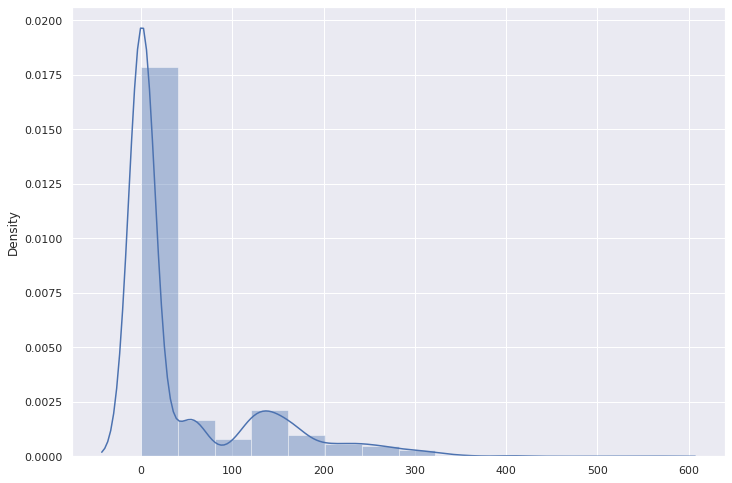

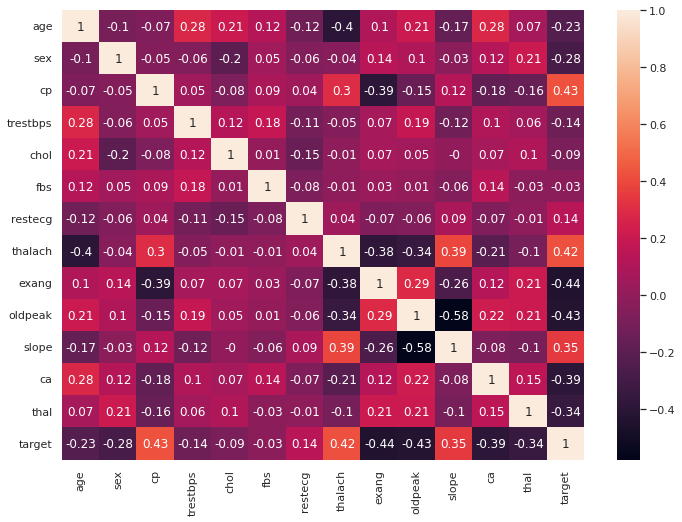

In [ ]:
# Printing the entire correlation matrix (Confusion matrix)
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(dataset, bins=14)
plt.show()

# Finally, let us get the correlation matrix
correlation_matrix = dataset.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

# **Exploratory Data Analysis:**
Exploratory Data Analysis (EDA) is the methodology by which we can analyze and investigate data sets and summarize their main characteristics, often employing data visualization methods. 

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


The count of the instances of target variable is: 1    165
0    138
Name: target, dtype: int64


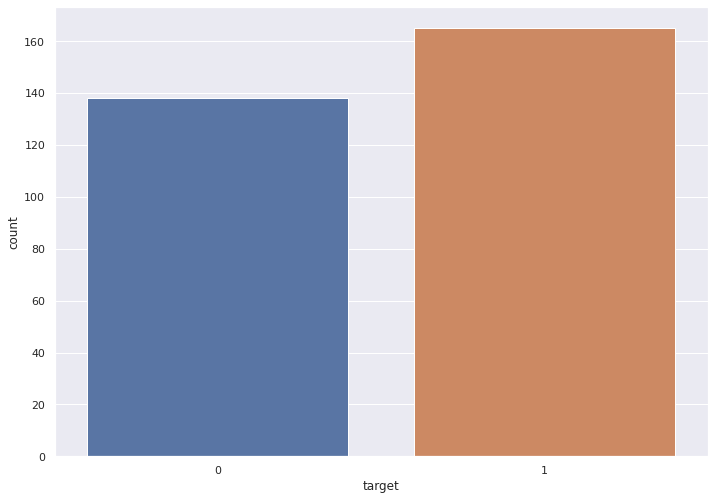

In [ ]:
# defining a target variable 'y':
y = dataset["target"]
sns.countplot(y)

# counting the instances where the value is '0' or '1':
target_instances_count = dataset.target.value_counts()

print("The count of the instances of target variable is:", target_instances_count)

In [ ]:
# Let us get the percentage/count of the patients with heart problems:
print("Percentage of users without heart problems: "+str(round(target_instances_count[0]*100/303,2)))
print("Percentage of users with heart problems: "+str(round(target_instances_count[1]*100/303,2)))

countNoDisease = len(dataset[dataset.target == 0])
countHaveDisease = len(dataset[dataset.target == 1])

Percentage of users without heart problems: 45.54
Percentage of users with heart problems: 54.46


## **Analysing 'sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca' and 'thal' features.**

### **Analysing *'sex'* feature:**

In [ ]:
dataset["sex"].unique()

array([1, 0])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


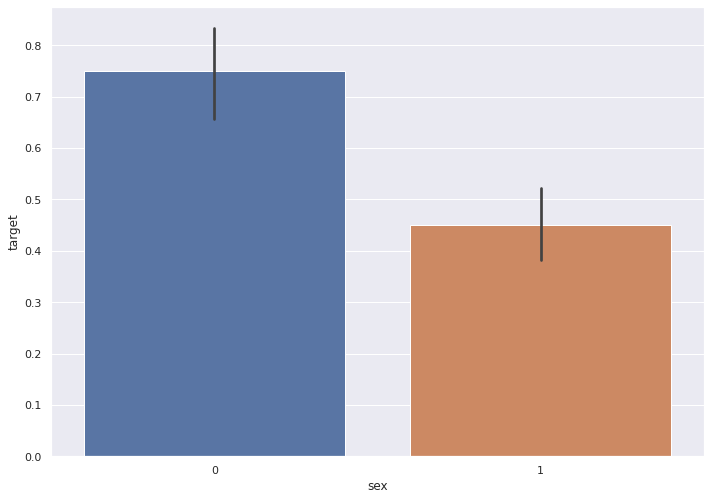

In [ ]:
# Barplot of the "sex" attribute with respect to the "target" variable:
sns.barplot(dataset["sex"], y)

### **Analysing *'Chest Pain Type'* feature:**

In [ ]:
dataset["cp"].unique()

array([3, 2, 1, 0])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


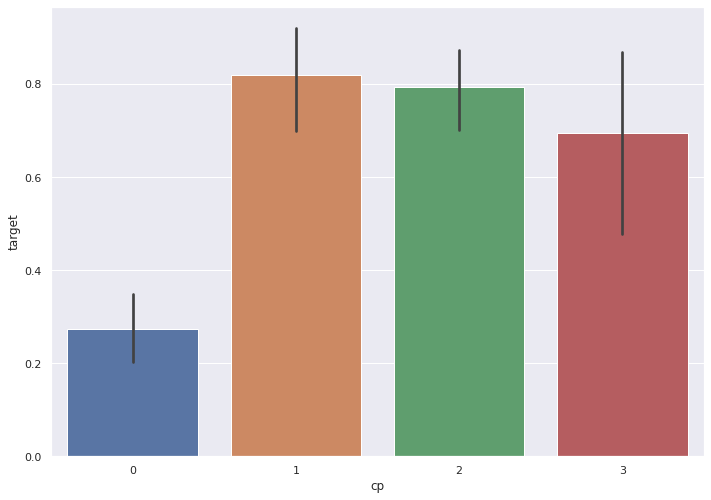

In [ ]:
# Barplot of the "cp" (Chest Pain Type) attribute with respect to the "target" variable:
sns.barplot(dataset["cp"], y)

*Note:* that chest pain of '0', i.e. the individuals with 'typical angina' are much less likely to have cardiac problems.

### **Analysing *'FBS'* feature:**

In [ ]:
dataset["fbs"].unique()

array([1, 0])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


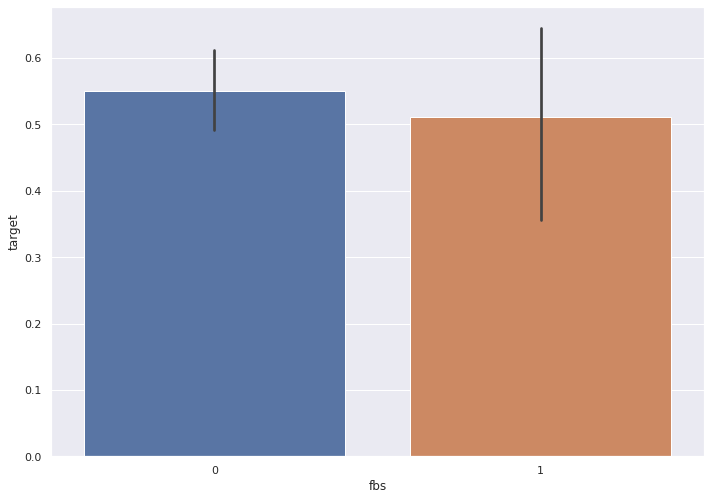

In [ ]:
# Barplot of the "fbs" (Chest Pain Type) attribute with respect to the "target" variable:
sns.barplot(dataset["fbs"], y)

### **Analysing *'restecg'* feature:**

In [ ]:
dataset["restecg"].unique()

array([0, 1, 2])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


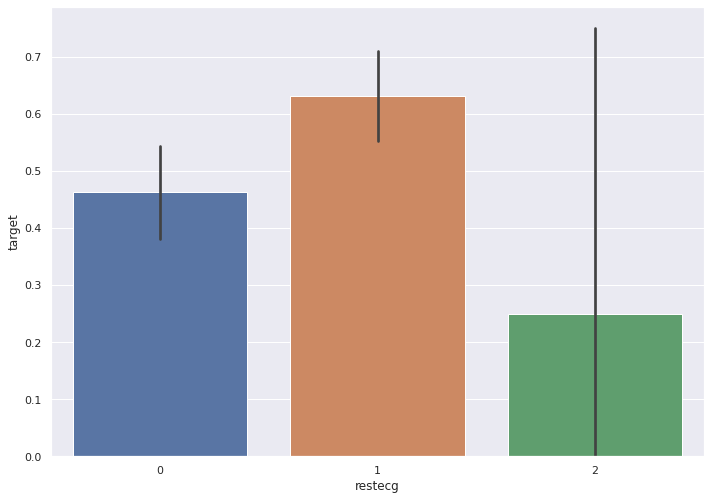

In [ ]:
# Barplot of the "restecg" (Resting ECG) attribute with respect to the "target" variable:
sns.barplot(dataset["restecg"], y)

By analysis of this 'restecg' feature, we realize that the individuals with restecg '1' and '0' are much more likely to have a cardiac problem than the individual with restecg '2'.

### **Analysing *'Slope'* feature:**

In [ ]:
dataset["slope"].unique()

array([0, 2, 1])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


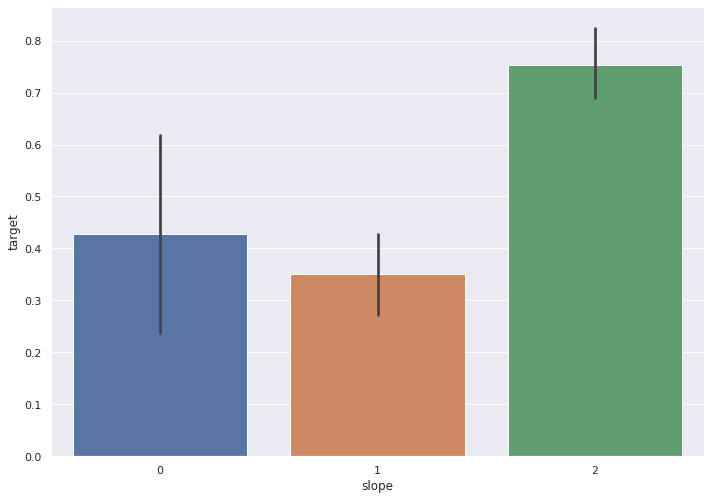

In [ ]:
# Barplot of the "slope" attribute with respect to the "target" variable:
sns.barplot(dataset["slope"], y)

Post analysis of 'slope' attribute, we observe that the slope '2' entails more heart pain that the slope values of '0' and '1'.

### **Analysing *'exang'* feature:**

In [ ]:
dataset["exang"].unique()

array([0, 1])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


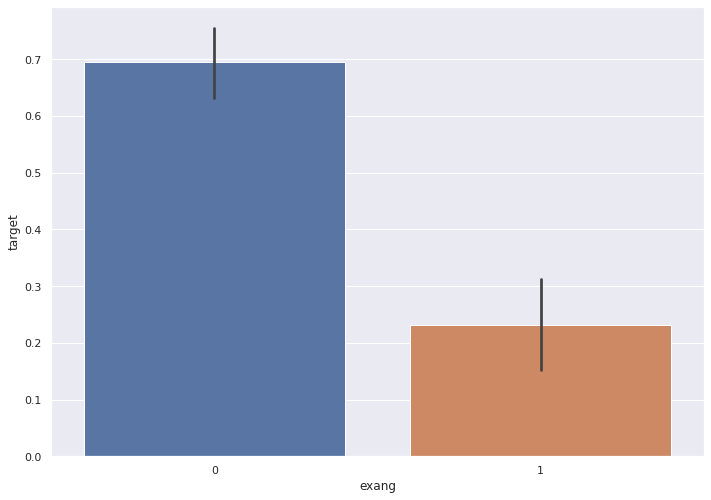

In [ ]:
# Barplot of the "exang" attribute with respect to the "target" variable:
sns.barplot(dataset["exang"], y)

Here, it is observed that individuals with 'exang' = 1 i,e. excercise induced angina are much less likely to have cardiac problems.

### **Analysing *'ca'* feature:**

In [ ]:
dataset["ca"].unique()

array([0, 2, 1, 3, 4])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


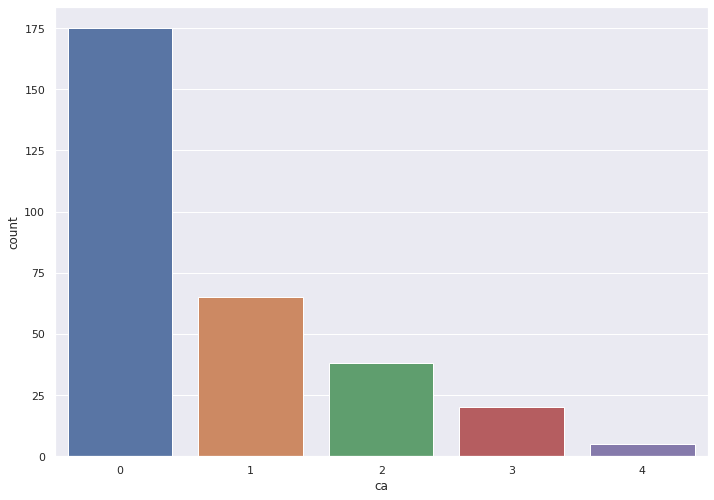

In [ ]:
sns.countplot(dataset["ca"])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


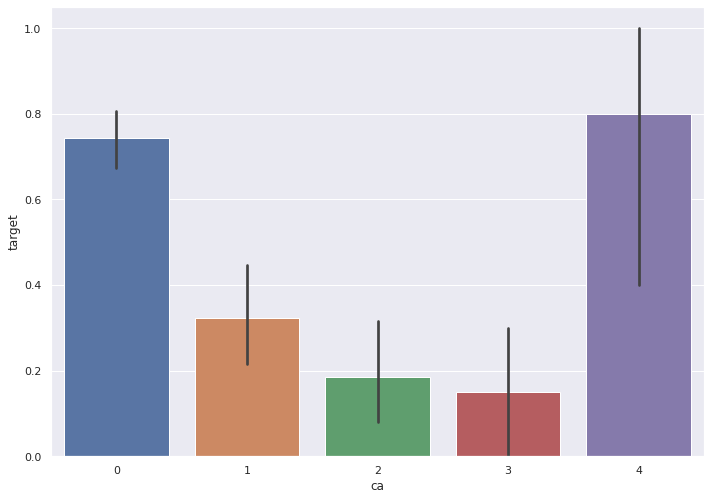

In [ ]:
# Barplot of the "ca" attribute with respect to the "target" variable:
sns.barplot(dataset["ca"], y)

Here, it is observed that category 'ca' = 4 has extremely high number of individuals with heart problems.

### **Analysing *'thal'* feature:**

In [ ]:
dataset["thal"].unique()

array([1, 2, 3, 0])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


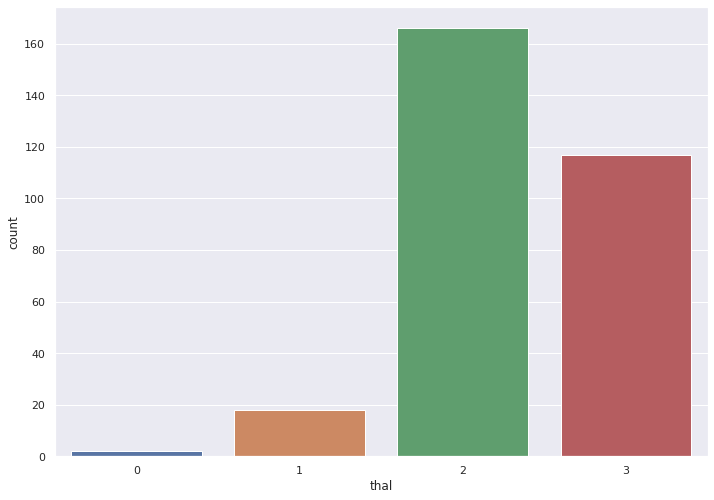

In [ ]:
sns.countplot(dataset["thal"])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


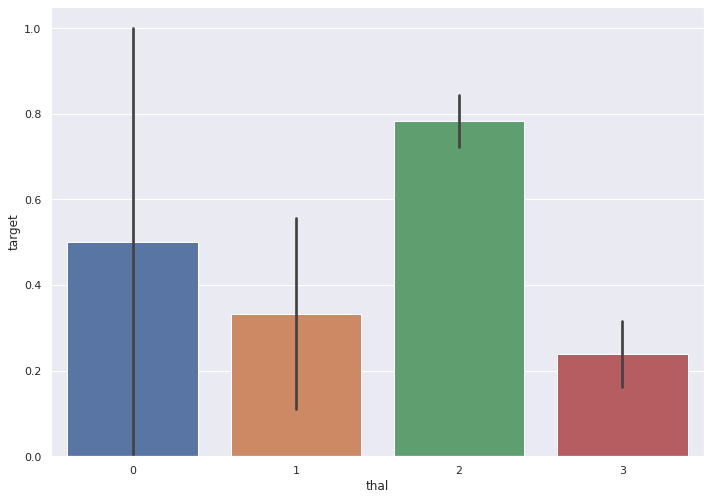

In [ ]:
# Barplot of the "thal" attribute with respect to the "target" variable:
sns.barplot(dataset["thal"], y)

# **Train Test Split**
By definition, A model validation technique called train-test-split allows you to mimic how a model would perform on brand-new, untested data. 

In [ ]:
# Using sklearn to import train_test_split() method:
from sklearn.model_selection import train_test_split

# We can generate a 'predictors' frame by removing 'target' from the 'dataset'
# we can obtain that by using drop() method
predictors = dataset.drop("target", axis = 1)

# Our target for the entire dataset
target = dataset["target"]

# Splitting the dataset with 80:20 (Train size = 0.80, Test size = 0.20)
X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

let us print out the dimension of the X_train, X_test, Y_train, Y_test:

In [ ]:
# X_train:
X_train.shape

(242, 13)

In [ ]:
# X_test:
X_test.shape

(61, 13)

In [ ]:
# Y_train:
Y_train.shape

(242,)

In [ ]:
# Y_test:
Y_test.shape

(61,)

# **Model fitting:**
The definition and the entail details about model fitting are present in the report.
For this project, we are considering the following Machine Learning Algorithms:


1. Logistic Regression
2. Naive Bayes
3. Support Vector Machines
4. Decision Tree
5. Random Forest
6. K-Nearest Neighbors
7. XGBoost
8. Neural Network

In the report, one can find the observations in regard to the performance comparison and the way these above mentioned algorithms perform on this given dataset.

### **Logistic Regression**
In regression analysis, logistic regression estimates a logistic model's parameters (the coefficients in the linear combination).
Formally, binary logistic regression has a single binary dependent variable (two classes, coded by an indicator variable) with the values "0" and "1," while the independent variables can either be continuous variables or binary variables. (Source: *Wikipedia*)

In [ ]:
# importing 'accuracy_score' from sklearn to store accuracy of Logistic Regression:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# import Logistic Regression function from sklearn:
from sklearn.linear_model import LogisticRegression

lr_classifier = LogisticRegression()

# fit the training dataset:
lr_classifier.fit(X_train, Y_train)

# Getting the 'Y_pred':
Y_pred = lr_classifier.predict(X_test)

# Shape of 'Y_pred':
Y_pred.shape

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(61,)

**Accuracy Score of Logistic Regression**

In [ ]:
# Accuracy will be rounded up for mathematical clarity and for comparisons:
accuracy_score_logistic_regression = round(accuracy_score(Y_pred, Y_test)*100, 4)
print("The accuracy using Logistic Regression is: " + str(accuracy_score_logistic_regression) + " %")
print("The Classification report with precision, recall value, F1-Score, and support is:")
print()

The accuracy using Logistic Regression is: 85.2459 %
The Classification report with precision, recall value, F1-Score, and support is:


IndexError: ignored

### **Naive Bayes Classifier**
Naive Bayes is a straightforward method for building classifiers. These models assign class labels to problem cases, which are represented as vectors of feature values, and the class labels are chosen from a finite set. For training such classifiers, there isn't just one technique, but rather a family of algorithms built on the premise that, given the class variable, the value of one feature is independent of the value of every other feature. (Source: *Wikipedia*)

In [ ]:
# importing 'accuracy_score' from sklearn to store accuracy of Naive Bayes Algorithm:
from sklearn.metrics import accuracy_score

# import Naive Bayes Algorithm function from sklearn:
from sklearn.naive_bayes import GaussianNB

# Creating an instance of the Naive Bayes
nb_classifier = GaussianNB()

# fit the training dataset:
nb_classifier.fit(X_train, Y_train)

# Getting the 'Y_pred':
Y_pred = nb_classifier.predict(X_test)

# Shape of 'Y_pred':
Y_pred.shape

(61,)

**Accuracy Score of Naive Bayes Classifier**

In [ ]:
# Accuracy will be rounded up for mathematical clarity and for comparisons:
accuracy_score_naive_bayes = round(accuracy_score(Y_pred, Y_test)*100, 4)
print("The accuracy using Naive Bayes Classifier is: " + str(accuracy_score_naive_bayes) + " %")

The accuracy using Naive Bayes Classifier is: 85.2459 %


### **Support Vector Machines**
SVM assigns training samples to spatial coordinates in order to maximize the distance between the two categories.
Then, based on which side of the gap they fall, new examples are projected into that same space and predicted to belong to a category. (Source: *Wikipedia*)

**Note:** Apart from Linear Classification, Using a technique known as the kernel trick, SVMs can effectively execute a non-linear classification by implicitly mapping their inputs into high-dimensional feature spaces. 

In [ ]:
# importing 'accuracy_score' from sklearn to store accuracy of Support Vector Machine:
from sklearn.metrics import accuracy_score

# import Support Vector Machine (SVM) from sklearn:
from sklearn import svm

# Using kernel trick to tune SVM for classification
svm_classifier = svm.SVC(kernel='linear')

# fit the training dataset:
svm_classifier.fit(X_train, Y_train)

# Getting the 'Y_pred':
Y_pred_svm = svm_classifier.predict(X_test)

# Shape of 'Y_pred':
Y_pred_svm.shape

(61,)

**Accuracy Score of Support Vector Machines**

In [ ]:
# Accuracy will be rounded up for mathematical clarity and for comparisons:
accuracy_score_svm = round(accuracy_score(Y_pred_svm, Y_test)*100, 4)
print("The accuracy using Support Vector Machines is: " + str(accuracy_score_svm) + " %")

The accuracy using Support Vector Machines is: 81.9672 %


### **Decision Tree**
A decision tree is a flowchart-like structure in which each leaf node represents a class label, each internal node represents a "test" on an attribute (such as whether a coin will land heads or tails), and each branch indicates the result of the test (decision taken after computing all attributes. Classification rules are represented by the routes from root to leaf. (Source: *Wikipedia*)

In [ ]:
# importing Decision Tree Algorithm from sklearn:
from sklearn.tree import DecisionTreeClassifier

# importing 'accuracy_score' from sklearn to store accuracy of Decision Tree Algorithm:
from sklearn.metrics import accuracy_score

# Considering that decision tree can produce various accuracies for multiple cases; we need to capture the max accuracy using a variable
max_accuracy = 0

# Storing best state in the decision tree model
best_state = 0

for curr_state in range(200):
  dec_tree_classifier = DecisionTreeClassifier(random_state=curr_state)
  dec_tree_classifier.fit(X_train, Y_train)
  Y_pred_dec_tree = dec_tree_classifier.predict(X_test)
  accuracy_current_state = round(accuracy_score(Y_pred_dec_tree, Y_test)*100, 2)

  if (accuracy_current_state > max_accuracy):
    max_accuracy = accuracy_current_state
    best_state = curr_state



print("The maximum accuracy is: ", max_accuracy)
print("The best state for the maximum accuracy is: ", best_state)

dec_tree_classifier = DecisionTreeClassifier(random_state=best_state)

# fit the training dataset:
dec_tree_classifier.fit(X_train, Y_train)

# Getting the 'Y_pred':
Y_pred_dec_tree = dec_tree_classifier.predict(X_test)

# Shape of 'Y_pred':
Y_pred_dec_tree.shape

The maximum accuracy is:  81.97
The best state for the maximum accuracy is:  11


(61,)

**Accuracy Score of Decision Tree Algorithm**

In [ ]:
# Accuracy will be rounded up for mathematical clarity and for comparisons:
accuracy_score_decision_tree = round(accuracy_score(Y_pred_dec_tree, Y_test)*100, 4)
print("The accuracy using Support Vector Machines is: " + str(accuracy_score_decision_tree) + " %")

The accuracy using Support Vector Machines is: 81.9672 %


### **Random Forest Algorithm**
The class that the majority of the trees chose is the output of the random forest for classification problems. The mean or average prediction of each individual tree is returned for regression tasks. The tendency of decision trees to overfit their training set is corrected by random decision forests. Although they frequently outperform decision trees, gradient boosted trees are more accurate than random forests. (Source: *Wikipedia*)

In [ ]:
# importing Random Forest Algorithm from sklearn:
from sklearn.ensemble import RandomForestClassifier

# importing 'accuracy_score' from sklearn to store accuracy of Random Forest Algorithm:
from sklearn.metrics import accuracy_score

# Considering that decision tree can produce various accuracies for multiple cases; we need to capture the max accuracy using a variable
max_accuracy = 0

# Storing best state in the Random Forest model
best_state = 0

for state in range(2000):
  random_forest_classifier = RandomForestClassifier(random_state=state)
  random_forest_classifier.fit(X_train, Y_train)
  Y_pred_random_forest = random_forest_classifier.predict(X_test)
  accuracy_current_state = round(accuracy_score(Y_pred_random_forest, Y_test)*100, 2)

  if (accuracy_current_state > max_accuracy):
    max_accuracy = accuracy_current_state
    best_state = state


print("The maximum accuracy is: ", max_accuracy)
print("The best state for the maximum accuracy is: ", best_state)

random_forest_classifier = RandomForestClassifier(random_state=best_state)

# fit the training dataset:
random_forest_classifier.fit(X_train, Y_train)

# Getting the 'Y_pred':
Y_pred_random_forest = random_forest_classifier.predict(X_test)

# Shape of 'Y_pred':
Y_pred_random_forest.shape

KeyboardInterrupt: ignored

**Accuracy Score of Random Forest Algorithm**

In [ ]:
# Accuracy will be rounded up for mathematical clarity and for comparisons:
accuracy_score_random_forest = round(accuracy_score(Y_pred_random_forest, Y_test)*100, 4)
print("The accuracy using Random Forest Algorithm is: " + str(accuracy_score_random_forest) + " %")

### **K Nearest Neighbors**
The class that the majority of the trees chose is the output of the random forest for classification problems. The mean or average prediction of each individual tree is returned for regression tasks. The tendency of decision trees to overfit their training set is corrected by random decision forests. Although they frequently outperform decision trees, gradient boosted trees are more accurate than random forests. (Source: *Wikipedia*)

In [ ]:
# importing Random Forest Algorithm from sklearn:
from sklearn.ensemble import RandomForestClassifier

# importing 'accuracy_score' from sklearn to store accuracy of Random Forest Algorithm:
from sklearn.metrics import accuracy_score

# Considering that decision tree can produce various accuracies for multiple cases; we need to capture the max accuracy using a variable
max_accuracy = 0

# Storing best state in the Random Forest model
best_state = 0

for state in range(2000):
  random_forest_classifier = RandomForestClassifier(random_state=state)
  random_forest_classifier.fit(X_train, Y_train)
  Y_pred_random_forest = random_forest_classifier.predict(X_test)
  accuracy_current_state = round(accuracy_score(Y_pred_random_forest, Y_test)*100, 2)

  if (accuracy_current_state > max_accuracy):
    max_accuracy = accuracy_current_state
    best_state = state

accuracy_score_knn = max_accuracy
print("The maximum accuracy is: ", accuracy_score_knn)
print("The best state for the maximum accuracy is: ", best_state)

random_forest_classifier = RandomForestClassifier(random_state=best_state)

# fit the training dataset:
random_forest_classifier.fit(X_train, Y_train)

# Getting the 'Y_pred':
Y_pred_random_forest = random_forest_classifier.predict(X_test)

# Shape of 'Y_pred':
Y_pred_random_forest.shape

**Accuracy Score of Random Forest Algorithm**

In [ ]:
# Accuracy will be rounded up for mathematical clarity and for comparisons:
accuracy_score_random_forest = round(accuracy_score(Y_pred_random_forest, Y_test)*100, 4)
print("The accuracy using Random Forest Algorithm is: " + str(accuracy_score_random_forest) + " %")

### **Neural Network**
Artificial neural networks model biological neuron connections as weights between nodes. An excitatory link is represented by a positive weight, whereas an inhibitory connection is represented by a negative weight. Each input is given a weight before being added together. A linear combination is the term used to describe this activity.
Finally, an activation function regulates the output's amplitude.
For instance, a typical range for acceptable output is between 0 and 1, or it may be between 1 and 1. (Source: *Wikipedia*)

In [ ]:
# importing Random Forest Algorithm from sklearn:
from keras.models import Sequential

# importing 'accuracy_score' from sklearn to store accuracy of Random Forest Algorithm:
from keras.layers import Dense

# https://stats.stackexchange.com/a/136542 helped a lot in avoiding overfitting

# You can create a Sequential model by passing a list of layers to the Sequential constructor
seq_cnn_model = Sequential()

# Adding the reLU function non-linearities
seq_cnn_model.add(Dense(11,activation='relu',input_dim=13))

# Activating the sigmoids function
seq_cnn_model.add(Dense(1,activation='sigmoid'))

seq_cnn_model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

**Accuracy Score of CNN Algorithm**

In [ ]:
# Fitting the model for the accuracy
seq_cnn_model.fit(X_train, Y_train, epochs=300)

# Accuracy will be rounded up for mathematical clarity and for comparisons:
Y_Pred_cnn = seq_cnn_model.predict(X_test)

rounded = [round(x[0]) for x in Y_Pred_cnn]

Y_Pred_cnn = rounded

accuracy_score_cnn = round(accuracy_score(Y_Pred_cnn, Y_test)*100, 2)

print("The accuracy score achieved using Neural Network is: "+str(accuracy_score_cnn)+" %")

#Note: Accuracy of 85% can be achieved on the test set, by setting epochs=2000, and number of nodes = 11. 

## **Summary of the Algorithms**
In this section, let us analyze the accuracy of all the algorithms. This helps us in analyzing the models and also understand the reason behind the way any algirithm performs on the given dataset and the distinction between the performances.

More details on the methods and the reasoning behind their good, poor, or average performance along with the evaluation of the models is captured in detail in the report. 

In [ ]:
# Overview of the accuracy of all the algorithms implemented on given dataset

accuracy_scores = [accuracy_score_logistic_regression, accuracy_score_naive_bayes, accuracy_score_svm, accuracy_score_knn, accuracy_score_random_forest, accuracy_score_decision_tree, accuracy_score_cnn]
ml_algorithms = ["Logistic Regression","Naive Bayes","Support Vector Machine","K-Nearest Neighbors","Random Forest", "Decision Tree", "Neural Network"]    

for i in range(len(ml_algorithms)):
  print("The accuracy score achieved using "+ ml_algorithms[i] + " is: "+ str(accuracy_scores[i])+ " %")

In [ ]:
# Bar Plot of all the algorithms implemented:
sns.set(rc={'figure.figsize':(15, 8)})
plt.xlabel("Implemented ML Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(ml_algorithms,accuracy_scores)